<a href="https://colab.research.google.com/github/shyamjith94/Machine-Learning-Regression/blob/main/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
%%capture
!pip install turicreate

In [98]:
import turicreate as tc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from math import log, sqrt

In [99]:
def get_polynomial_frame(feature, degree):
    """ Creating Sframe with using degree range
        of poer of columns"""
    # initilize empty sframe
    poly_frame = tc.SFrame()
    poly_frame["power_1"] = feature
    if degree >1:
        # power_1 predefind by initial feature loop range start from two
        for i in range(2, degree+1):
            name = "power_" + str(i)
            poly_frame[name] = feature.apply(lambda x: x**i)
    return poly_frame


In [100]:
tmp = tc.SArray([1., 2., 3.])
print(get_polynomial_frame(tmp, 3))

+---------+---------+---------+
| power_1 | power_2 | power_3 |
+---------+---------+---------+
|   1.0   |   1.0   |   1.0   |
|   2.0   |   4.0   |   8.0   |
|   3.0   |   9.0   |   27.0  |
+---------+---------+---------+
[3 rows x 3 columns]



In [101]:
data = tc.SFrame.read_csv("/content/drive/My Drive/Machine Learning: Regression/Data/2/c_kc_house_data.csv/kc_house_data.csv")

Finished parsing file /content/drive/My Drive/Machine Learning: Regression/Data/2/c_kc_house_data.csv/kc_house_data.csv

Parsing completed. Parsed 100 lines in 0.191416 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/drive/My Drive/Machine Learning: Regression/Data/2/c_kc_house_data.csv/kc_house_data.csv

Parsing completed. Parsed 21613 lines in 0.141862 secs.

In [102]:
data.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0
5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0
2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0
1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0
7237550310,20140512T000000,1225000.0,4,4.5,5420,101930,1.0,0,0
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0
2008000270,20150115T000000,291850.0,3,1.5,1060,9711,1.0,0,0
2414600126,20150415T000000,229500.0,3,1.0,1780,7470,1.0,0,0
3793500160,20150312T000000,323000.0,3,2.5,1890,6560,2.0,0,0


In [103]:

# Sorting fucntion will effect on graph. if sorting not done graph have multiple lines
data = data.sort(['sqft_living', 'price'])

In [104]:
poly_data_1 = get_polynomial_frame(data["sqft_living"], 1)
poly_data_1["price"] = data["price"]
poly_data_1.head()  

power_1,price
290,142000.0
370,276000.0
380,245000.0
384,265000.0
390,228000.0
390,245000.0
410,325000.0
420,229050.0
420,280000.0
430,80000.0


In [105]:
model_1 = tc.linear_regression.create(poly_data_1, features=["power_1"], target="price", validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.019044     | 4362074.683616     | 261440.790302                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [106]:
model_1._get("coefficients")

name,index,value,stderr
(intercept),None,-43579.08801882982,4402.689690321097
power_1,None,280.622772149646,1.9363985520064766


Text(0.5, 1.0, 'Degree Of One Prediction')

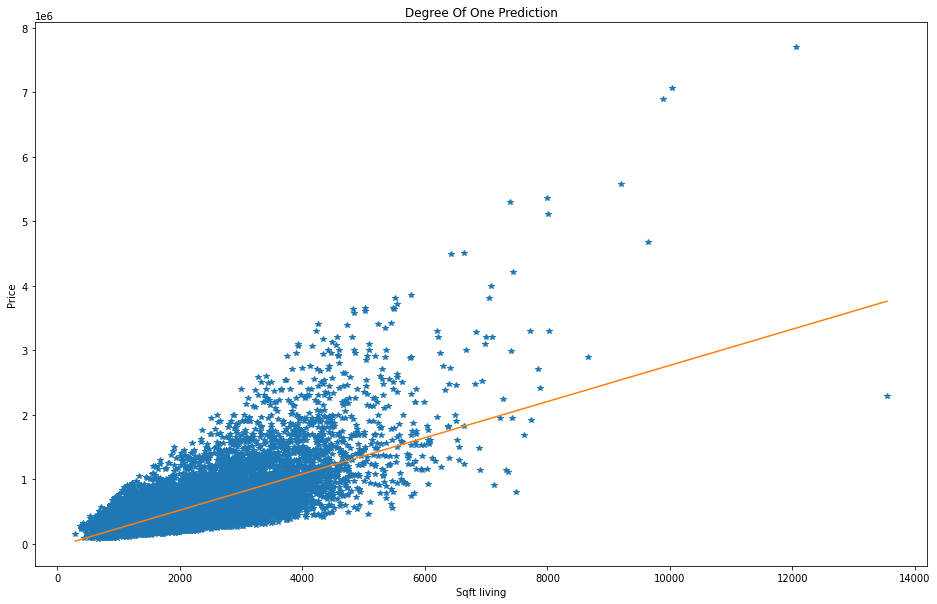

In [107]:
plt.figure(figsize=(16, 10))
plt.plot(poly_data_1["power_1"], poly_data_1["price"], "*",
         poly_data_1["power_1"], model_1.predict(poly_data_1), "-")
plt.xlabel("Sqft living")
plt.ylabel("Price")
plt.title("Degree Of One Prediction")


In [108]:
poly_data_2 = get_polynomial_frame(data["sqft_living"], 2)
train_features = poly_data_2.column_names()
poly_data_2["price"] = data["price"]
poly_data_2.head()  

power_1,power_2,price
290,84100,142000.0
370,136900,276000.0
380,144400,245000.0
384,147456,265000.0
390,152100,228000.0
390,152100,245000.0
410,168100,325000.0
420,176400,229050.0
420,176400,280000.0
430,184900,80000.0


In [109]:
model_2 = tc.linear_regression.create(poly_data_2, features=train_features, target="price", validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.013741     | 5913021.143248     | 250948.367620                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [110]:
model_2._get("coefficients")

name,index,value,stderr
(intercept),None,199222.50159271213,7058.004803507183
power_1,None,67.99405839971828,5.287871989180475
power_2,None,0.038581232536686244,0.0008982465429586627


Text(0.5, 1.0, 'Degree Of Two Prediction')

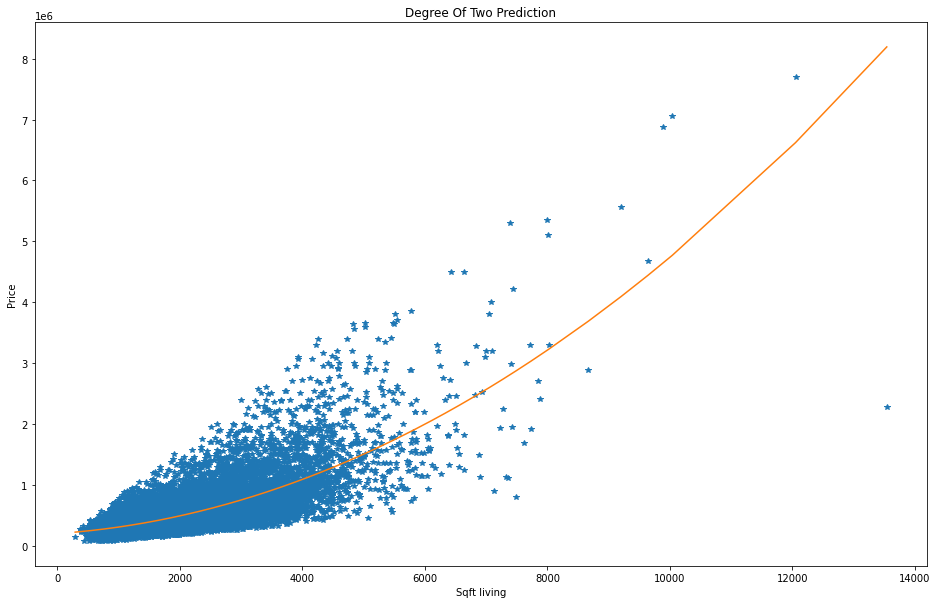

In [142]:
plt.figure(figsize=(16, 10))
plt.plot(poly_data_2["power_1"], poly_data_2["price"], "*",
         poly_data_2["power_1"], model_2.predict(poly_data_2),"-")
plt.xlabel("Sqft living")
plt.ylabel("Price")
plt.title("Degree Of Two Prediction")


In [112]:
poly_data_3 = get_polynomial_frame(data["sqft_living"], 3)
train_features = poly_data_3.column_names()
poly_data_3["price"] = data["price"]
poly_data_3.head()  

power_1,power_2,power_3,price
290,84100,24389000,142000.0
370,136900,50653000,276000.0
380,144400,54872000,245000.0
384,147456,56623104,265000.0
390,152100,59319000,228000.0
390,152100,59319000,245000.0
410,168100,68921000,325000.0
420,176400,74088000,229050.0
420,176400,74088000,280000.0
430,184900,79507000,80000.0


In [113]:
model_3 = tc.linear_regression.create(poly_data_3, features=train_features, target="price", validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.025507     | 3261066.776472     | 249261.285049                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [114]:
model_3._get("coefficients")

name,index,value,stderr
(intercept),None,336788.1292483162,10661.015315839397
power_1,None,-90.14763634795435,10.622289129142631
power_2,None,0.08703671850444093,0.0029663062160470285
power_3,None,-3.839852291218111e-06,2.2417490842344934e-07


Text(0.5, 1.0, 'Degree Of Three Prediction')

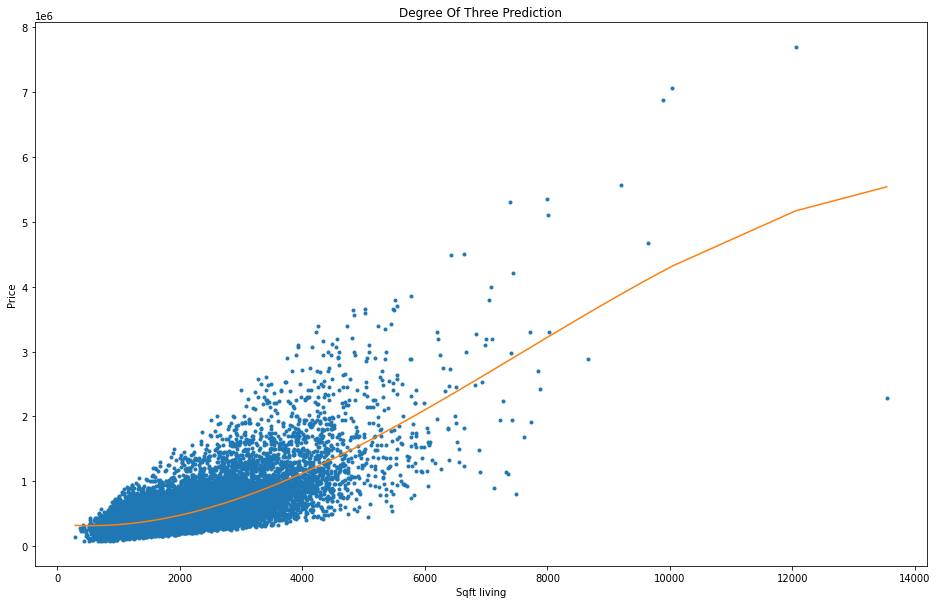

In [141]:
plt.figure(figsize=(16, 10))
plt.plot(poly_data_3["power_1"], poly_data_3["price"], ".",
         poly_data_3["power_1"], model_3.predict(poly_data_3))
plt.xlabel("Sqft living")
plt.ylabel("Price")
plt.title("Degree Of Three Prediction")

In [116]:
poly_data_15 = get_polynomial_frame(data["sqft_living"], 15)
train_features = poly_data_15.column_names()
poly_data_15["price"] = data["price"]
poly_data_15.head()  

power_1,power_2,power_3,power_4,power_5,power_6,power_7
290,84100,24389000,7072810000,2051114900000,594823321000000,1.7249876309e+17
370,136900,50653000,18741610000,6934395700000,2565726409000000,9.4931877133e+17
380,144400,54872000,20851360000,7923516800000,3010936384000000,1.14415582592e+18
384,147456,56623104,21743271936,8349416423424,3206175906594816,1.2311715481324093e+18
390,152100,59319000,23134410000,9022419900000,3518743761000000,1.37231006679e+18
390,152100,59319000,23134410000,9022419900000,3518743761000000,1.37231006679e+18
410,168100,68921000,28257610000,11585620100000,4750104241000000,1.94754273881e+18
420,176400,74088000,31116960000,13069123200000,5489031744000000,2.30539333248e+18
420,176400,74088000,31116960000,13069123200000,5489031744000000,2.30539333248e+18
430,184900,79507000,34188010000,14700844300000,6321363049000000,2.71818611107e+18


In [117]:
model_15 = tc.linear_regression.create(poly_data_15, features=train_features, target="price", validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.049482     | 2623876.191484     | 245489.785164                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [118]:
model_15._get("coefficients")

name,index,value,stderr
(intercept),None,30588.864709062735,176580.331445871
power_1,None,517.363727906559,572.9407141200935
power_2,None,-0.31861928281109975,0.7047161220891833
power_3,None,0.00010582241570841068,0.000406319424635244
power_4,None,-1.0402076474995555e-08,9.886790834285388e-08
power_5,None,-2.0882692433363966e-14,5.0282300591682385e-15
power_6,None,-5.940182377625283e-16,5.24667575122958e-16
power_7,None,2.059688970689416e-21,3.946461032101111e-18
power_8,None,2.539339964539265e-25,1.9861051591840214e-21
power_9,None,6.749255368523477e-30,4.539119556601603e-25


Text(0.5, 1.0, 'Degree Of 15 Prediction')

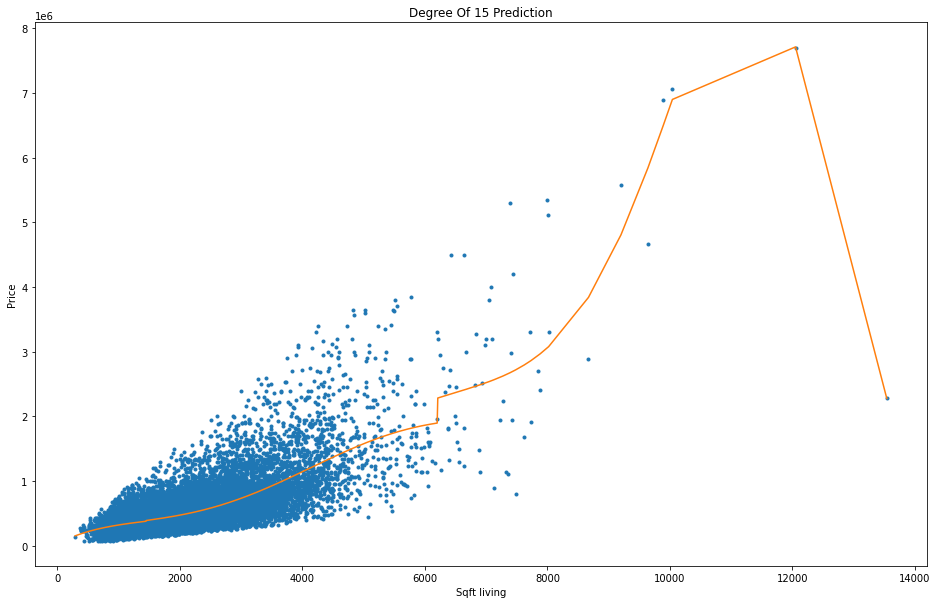

In [140]:
plt.figure(figsize=(16, 10))
plt.plot(poly_data_15["power_1"], poly_data_15["price"], ".",
         poly_data_15["power_1"], model_15.predict(poly_data_15))
plt.xlabel("Sqft living")
plt.ylabel("Price")
plt.title("Degree Of 15 Prediction")

In [125]:
subset_a, subset_b = data.random_split(0.5, seed=0)

In [126]:
subset_1, subset_2 = subset_a.random_split(0.5, seed=0)
subset_3, subset_4 = subset_b.random_split(0.5, seed=0)

In [127]:
poly_data_15_set1 = get_polynomial_frame(subset_1["sqft_living"], 15)
train_features = poly_data_15_set1.column_names()
poly_data_15_set1["price"] = subset_1["price"]
poly_data_15_set1.head()

power_1,power_2,power_3,power_4,power_5,power_6,power_7
430,184900,79507000,34188010000,14700844300000,6321363049000000,2.71818611107e+18
460,211600,97336000,44774560000,20596297600000,9474296896000000,4.35817657216e+18
470,220900,103823000,48796810000,22934500700000,10779215329000000,5.06623120463e+18
490,240100,117649000,57648010000,28247524900000,13841287201000000,6.78223072849e+18
500,250000,125000000,62500000000,31250000000000,15625000000000000,7.8125e+18
520,270400,140608000,73116160000,38020403200000,19770609664000000,1.028071702528e+19
520,270400,140608000,73116160000,38020403200000,19770609664000000,1.028071702528e+19
520,270400,140608000,73116160000,38020403200000,19770609664000000,1.028071702528e+19
550,302500,166375000,91506250000,50328437500000,27680640625000000,1.522435234375e+19
560,313600,175616000,98344960000,55073177600000,30840979456000000,1.727094849536e+19


In [128]:
model_15_set_1 = tc.linear_regression.create(poly_data_15_set1, features=train_features, target="price", validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.022051     | 2215670.450335     | 248785.193866                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [165]:
model_15_set_1_coff = model_15_set_1._get("coefficients")
model_15_set_1_coff

name,index,value,stderr
(intercept),None,199260.44402718166,361498.0068383879
power_1,None,155.34748604696824,1133.6315407529682
power_2,None,-0.06594319662471952,1.3311943064862903
power_3,None,3.739628013245966e-05,0.0007226898481960846
power_4,None,-4.018188379835784e-09,1.6327353703905018e-07
power_5,None,-8.773147368518858e-15,9.955189960874292e-15
power_6,None,8.425242292818103e-16,1.0576368786043608e-15
power_7,None,1.2887582464211863e-21,4.715865422864801e-18
power_8,None,5.956973254736691e-26,2.0156170022158085e-21
power_9,None,6.73691850057274e-32,3.617934322919732e-25


Text(0.5, 1.0, 'Degree Of 15 Set 1 Prediction')

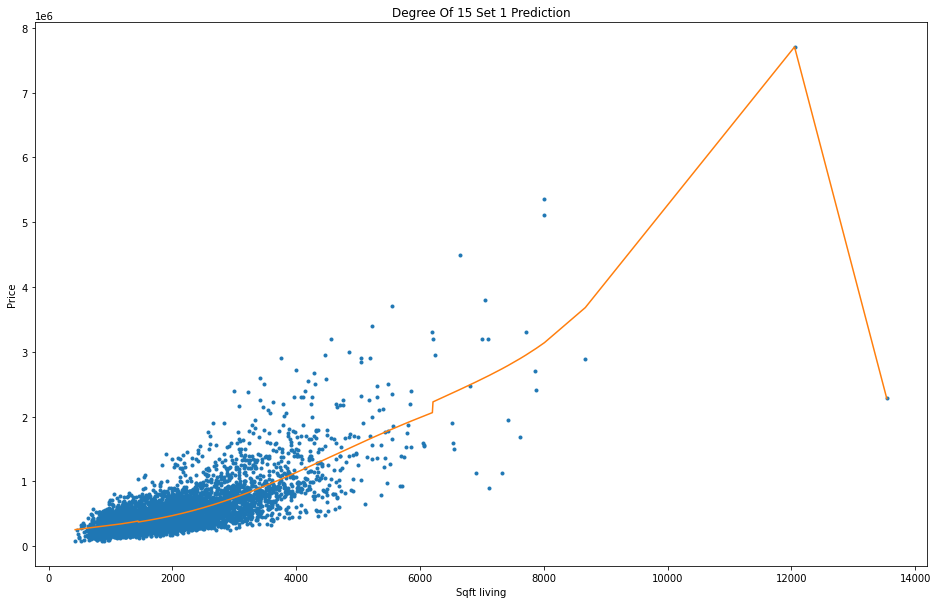

In [143]:
plt.figure(figsize=(16, 10))
plt.plot(poly_data_15_set1["power_1"], poly_data_15_set1["price"], ".",
         poly_data_15_set1["power_1"], model_15_set_1.predict(poly_data_15_set1))
plt.xlabel("Sqft living")
plt.ylabel("Price")
plt.title("Degree Of 15 Set 1 Prediction")

In [134]:
poly_data_15_set2 = get_polynomial_frame(subset_2["sqft_living"], 15)
train_features = poly_data_15_set2.column_names()
poly_data_15_set2["price"] = subset_2["price"]
poly_data_15_set2.head()

power_1,power_2,power_3,power_4,power_5,power_6,power_7
390,152100,59319000,23134410000,9022419900000,3518743761000000,1.37231006679e+18
410,168100,68921000,28257610000,11585620100000,4750104241000000,1.94754273881e+18
420,176400,74088000,31116960000,13069123200000,5489031744000000,2.30539333248e+18
420,176400,74088000,31116960000,13069123200000,5489031744000000,2.30539333248e+18
440,193600,85184000,37480960000,16491622400000,7256313856000000,3.19277809664e+18
520,270400,140608000,73116160000,38020403200000,19770609664000000,1.028071702528e+19
540,291600,157464000,85030560000,45916502400000,24794911296000000,1.338925209984e+19
550,302500,166375000,91506250000,50328437500000,27680640625000000,1.522435234375e+19
570,324900,185193000,105560010000,60169205700000,34296447249000000,1.954897493193e+19
580,336400,195112000,113164960000,65635676800000,38068692544000000,2.207984167552e+19


In [135]:
model_15_set_2 = tc.linear_regression.create(poly_data_15_set2, features=train_features, target="price", validation_set=None)


Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.020397     | 2118111.720093     | 234588.954297                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [166]:
model_15_set_2_coff = model_15_set_2._get("coefficients")
model_15_set_2_coff

name,index,value,stderr
(intercept),None,119811.42427455954,600171.6970892191
power_1,None,247.85084868927348,2397.759223333549
power_2,None,-0.049667224681699235,3.7119770258850147
power_3,None,-1.3887438869859916e-06,0.002727617431266052
power_4,None,4.809546723746228e-09,8.514425662418033e-07
power_5,None,-3.425755083485032e-14,1.6916930288289668e-14
power_6,None,1.0395419863626522e-17,1.0804727707208448e-15
power_7,None,-1.6109573231885382e-20,7.630356205063144e-17
power_8,None,-7.802391356312439e-25,5.2461362214106576e-20
power_9,None,5.230859594126319e-29,1.7300281185698916e-23


Text(0.5, 1.0, 'Degree Of 15 set 2 Prediction')

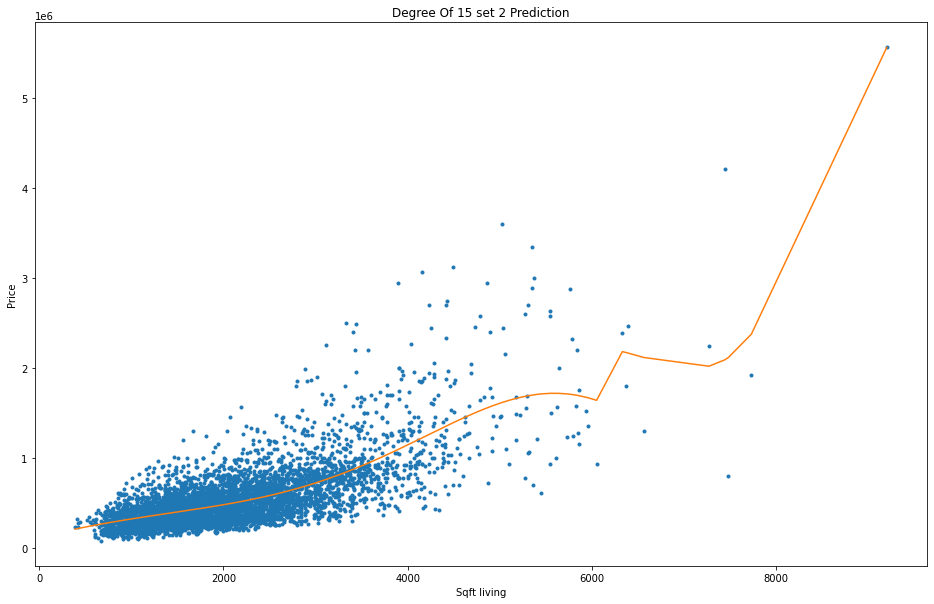

In [144]:
plt.figure(figsize=(16, 10))
plt.plot(poly_data_15_set2["power_1"], poly_data_15_set2["price"], ".",
         poly_data_15_set2["power_1"], model_15_set_2.predict(poly_data_15_set2))
plt.xlabel("Sqft living")
plt.ylabel("Price")
plt.title("Degree Of 15 set 2 Prediction")

In [145]:
poly_data_15_set3 = get_polynomial_frame(subset_3["sqft_living"], 15)
train_features = poly_data_15_set3.column_names()
poly_data_15_set3["price"] = subset_3["price"]
poly_data_15_set3.head()

power_1,power_2,power_3,power_4,power_5,power_6,power_7
390,152100,59319000,23134410000,9022419900000,3518743761000000,1.37231006679e+18
480,230400,110592000,53084160000,25480396800000,12230590464000000,5.87068342272e+18
480,230400,110592000,53084160000,25480396800000,12230590464000000,5.87068342272e+18
520,270400,140608000,73116160000,38020403200000,19770609664000000,1.028071702528e+19
520,270400,140608000,73116160000,38020403200000,19770609664000000,1.028071702528e+19
530,280900,148877000,78904810000,41819549300000,22164361129000000,1.174711139837e+19
530,280900,148877000,78904810000,41819549300000,22164361129000000,1.174711139837e+19
540,291600,157464000,85030560000,45916502400000,24794911296000000,1.338925209984e+19
560,313600,175616000,98344960000,55073177600000,30840979456000000,1.727094849536e+19
560,313600,175616000,98344960000,55073177600000,30840979456000000,1.727094849536e+19


In [146]:
model_15_set_3 = tc.linear_regression.create(poly_data_15_set3, features=train_features, target="price", validation_set=None)


Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.027607     | 2122192.859297     | 250359.407640                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [167]:
model_15_set_3_coff = model_15_set_3._get("coefficients")
model_15_set_3_coff

name,index,value,stderr
(intercept),None,101826.08675562241,523732.4863414012
power_1,None,336.45547236172905,1859.6480552415574
power_2,None,-0.15733379958981797,2.53344740063147
power_3,None,4.5026782369901705e-05,0.0016299764662498354
power_4,None,-1.9434227201915205e-09,4.433156312880973e-07
power_5,None,-5.4043269850738215e-14,1.0296453640641125e-14
power_6,None,-1.1406138123196687e-15,1.0904732033153477e-15
power_7,None,-8.371055155443928e-21,2.407638417101486e-17
power_8,None,3.784351846533751e-26,1.2934830750439988e-20
power_9,None,4.632644218670702e-29,2.8827345026336096e-24


Text(0.5, 1.0, 'Degree Of 15 set 3 Prediction')

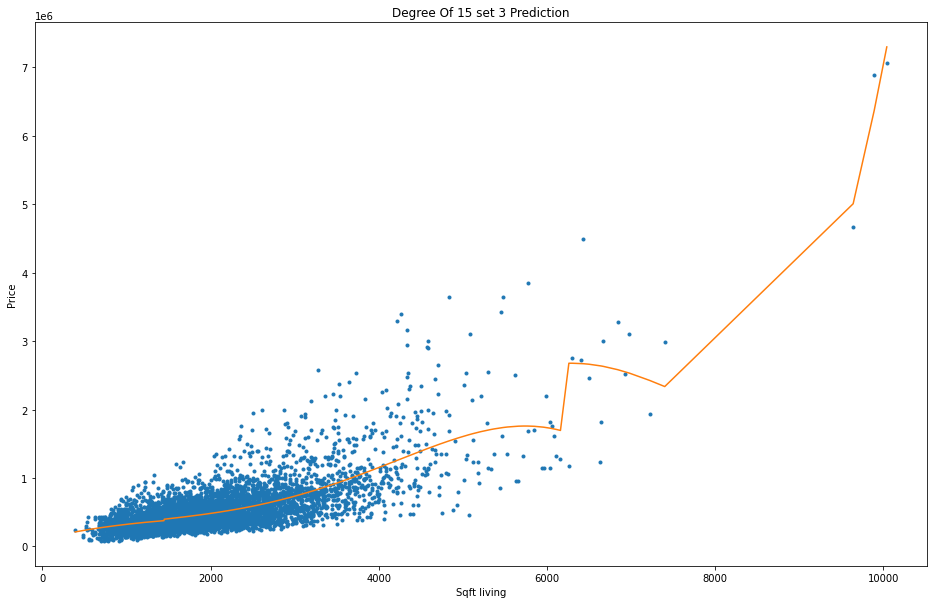

In [148]:
plt.figure(figsize=(16, 10))
plt.plot(poly_data_15_set3["power_1"], poly_data_15_set3["price"], ".",
         poly_data_15_set3["power_1"], model_15_set_3.predict(poly_data_15_set3))
plt.xlabel("Sqft living")
plt.ylabel("Price")
plt.title("Degree Of 15 set 3 Prediction")

In [149]:
poly_data_15_set4 = get_polynomial_frame(subset_4["sqft_living"], 15)
train_features = poly_data_15_set4.column_names()
poly_data_15_set4["price"] = subset_4["price"]
poly_data_15_set4.head()

power_1,power_2,power_3,power_4,power_5,power_6,power_7
290,84100,24389000,7072810000,2051114900000,594823321000000,1.7249876309e+17
370,136900,50653000,18741610000,6934395700000,2565726409000000,9.4931877133e+17
380,144400,54872000,20851360000,7923516800000,3010936384000000,1.14415582592e+18
384,147456,56623104,21743271936,8349416423424,3206175906594816,1.2311715481324093e+18
470,220900,103823000,48796810000,22934500700000,10779215329000000,5.06623120463e+18
530,280900,148877000,78904810000,41819549300000,22164361129000000,1.174711139837e+19
550,302500,166375000,91506250000,50328437500000,27680640625000000,1.522435234375e+19
550,302500,166375000,91506250000,50328437500000,27680640625000000,1.522435234375e+19
570,324900,185193000,105560010000,60169205700000,34296447249000000,1.954897493193e+19
580,336400,195112000,113164960000,65635676800000,38068692544000000,2.207984167552e+19


In [150]:
model_15_set_4 = tc.linear_regression.create(poly_data_15_set4, features=train_features, target="price", validation_set=None)


Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.030445     | 2314837.236637     | 244589.788422                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [168]:
model_15_set_4_coff = model_15_set_4._get("coefficients")
model_15_set_4_coff

name,index,value,stderr
(intercept),None,235855.6966592525,709691.8159018278
power_1,None,0.6017174041478516,3200.0206313103276
power_2,None,0.11469530986150167,5.524672096400503
power_3,None,-3.897248541833705e-05,0.004463797352547608
power_4,None,5.985310201866462e-09,1.5129851854166173e-06
power_5,None,6.883112313581651e-15,1.8498093158432517e-14
power_6,None,4.800529995891482e-17,1.2034469939079394e-15
power_7,None,2.812561083341085e-20,1.6129500925609346e-16
power_8,None,-3.7640806017009456e-24,1.1339600318548388e-19
power_9,None,-7.522313137080262e-28,3.696592082115012e-23


Text(0.5, 1.0, 'Degree Of 15 set 4 Prediction')

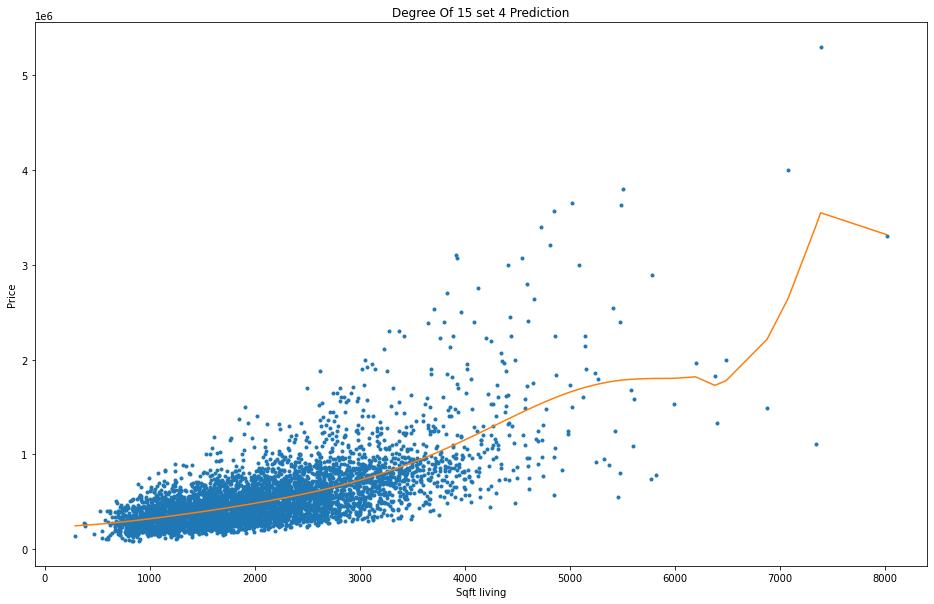

In [151]:
plt.figure(figsize=(16, 10))
plt.plot(poly_data_15_set4["power_1"], poly_data_15_set4["price"], ".",
         poly_data_15_set4["power_1"], model_15_set_4.predict(poly_data_15_set4))
plt.xlabel("Sqft living")
plt.ylabel("Price")
plt.title("Degree Of 15 set 4 Prediction")

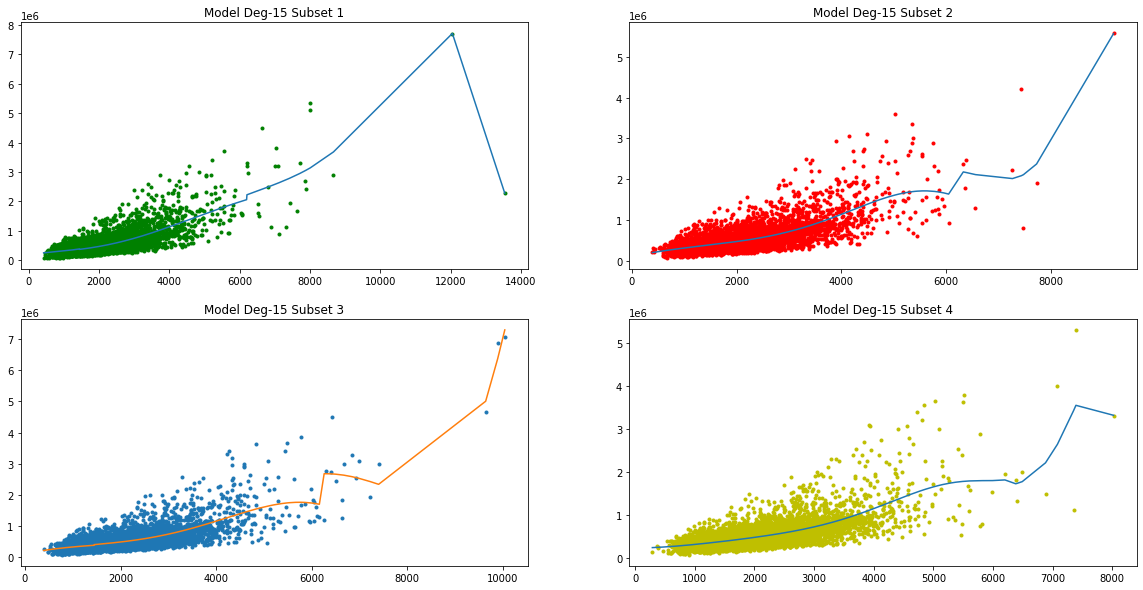

In [163]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs[0, 0].set_title("Model Deg-15 Subset 1")
axs[0, 0].plot(poly_data_15_set1["power_1"], poly_data_15_set1["price"], "g.", poly_data_15_set1["power_1"],
               model_15_set_1.predict(poly_data_15_set1), "-")

axs[0, 1].set_title("Model Deg-15 Subset 2")
axs[0, 1].plot(poly_data_15_set2["power_1"], poly_data_15_set2["price"], "r.", poly_data_15_set2["power_1"],
               model_15_set_2.predict(poly_data_15_set2), "-",)

axs[1, 0].set_title("Model Deg-15 Subset 3")
axs[1, 0].plot(poly_data_15_set3["power_1"], poly_data_15_set3["price"], ".", poly_data_15_set3["power_1"],
               model_15_set_3.predict(poly_data_15_set3), "-")

axs[1, 1].set_title("Model Deg-15 Subset 4")
axs[1, 1].plot(poly_data_15_set4["power_1"], poly_data_15_set4["price"], "y.", poly_data_15_set4["power_1"],
               model_15_set_4.predict(poly_data_15_set4), "-")

In [171]:
print("value of power_15 for subset_1:\t", model_15_set_1_coff[-1])
print("value of power_15 for subset_2:\t", model_15_set_2_coff[-1])
print("value of power_15 for subset_3:\t", model_15_set_3_coff[-1])
print("value of power_15 for subset_4:\t", model_15_set_4_coff[-1])

value of power_15 for subset_1:	 {'name': 'power_15', 'index': None, 'value': 6.696099529559288e-55, 'stderr': 2.8327513937390537e-50}
value of power_15 for subset_2:	 {'name': 'power_15', 'index': None, 'value': -1.3781825384015618e-52, 'stderr': 4.762632251481526e-48}
value of power_15 for subset_3:	 {'name': 'power_15', 'index': None, 'value': 4.814236720409996e-54, 'stderr': 6.030326850833458e-49}
value of power_15 for subset_4:	 {'name': 'power_15', 'index': None, 'value': -4.7534347826826163e-51, 'stderr': 2.1403286675937423e-47}


**Train and test data split and check RSS 1 to 15**

In [183]:
training_and_validation_data, testing_data = data.random_split(0.9, seed=1)
training_data, validation_data = training_and_validation_data.random_split(0.5, seed=1)

In [191]:
for i in range(1,15):
    poly_data = get_polynomial_frame(training_data["sqft_living"], i)
    train_features = poly_data.column_names()
    poly_data["price"] = training_data["price"]
    model = tc.linear_regression.create(poly_data, features=train_features, target="price", validation_set=None, verbose=False)
    poly_validation = get_polynomial_frame(validation_data['sqft_living'], 1)
    prediction = model.predict(poly_validation)
    residuals = prediction - validation_data["price"]
    residual_square = residuals *residuals
    residual_square_sum = residual_square.sum()
    print("The ", i , "degree polynomial model RSS:\t",residual_square_sum)

The  1 degree polynomial model RSS:	 676709767608078.2
The  2 degree polynomial model RSS:	 905555243743277.9
The  3 degree polynomial model RSS:	 2211017558715247.2
The  4 degree polynomial model RSS:	 971435281454058.4
The  5 degree polynomial model RSS:	 943850044842445.8
The  6 degree polynomial model RSS:	 880951923835996.5
The  7 degree polynomial model RSS:	 2434642920328993.5
The  8 degree polynomial model RSS:	 801110199031734.1
The  9 degree polynomial model RSS:	 871828617917276.0
The  10 degree polynomial model RSS:	 823293248068429.0
The  11 degree polynomial model RSS:	 784707199856867.5
The  12 degree polynomial model RSS:	 769838300198451.5
The  13 degree polynomial model RSS:	 768989475778960.6
The  14 degree polynomial model RSS:	 773849661945665.8


In [196]:
poly_data = get_polynomial_frame(training_data["sqft_living"], 7)
train_features = poly_data.column_names()
poly_data["price"] = training_data["price"]
model = tc.linear_regression.create(poly_data, features=train_features, target="price", validation_set=None, verbose=False)
poly_validation = get_polynomial_frame(testing_data['sqft_living'], 7)
prediction = model.predict(poly_validation)
residuals = prediction - testing_data["price"]
residual_square = residuals *residuals
residual_square_sum = residual_square.sum()
print("The ", 7 , "degree polynomial model RSS:\t",residual_square_sum)

The  7 degree polynomial model RSS:	 126420040806957.45
